In [1]:
# importing the required libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import pickle

In [2]:
# loading the dataset
df = pd.read_csv('../dataset/diabetes.csv')

In [3]:
# first 5 rows
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
# describing the structure of the dataset
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [5]:
df.isna().sum()
# Although this shows 0 null values, some of the values are represented as '0' which are null

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [6]:
# replacing value '0' with median of that column
columns = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
for i in columns:
    df[i].replace(0, df[i].median(), inplace=True)

In [7]:
# splitting the data into test and train sets
X = df.drop('Outcome', axis=1)
y = df.Outcome
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.15, random_state=143)

In [8]:
# trying the Random Forest Classifier Model
model_rf = RandomForestClassifier()
model_rf.fit(X_train, y_train)

RandomForestClassifier()

In [10]:
 #Accuracy achieved = 78%
model_rf.score(X_test, y_test)

0.7758620689655172

In [11]:
# trying the Logistic Regression Model
model_lr = LogisticRegression(max_iter=1000)
model_lr.fit(X_test, y_test)

LogisticRegression(max_iter=1000)

In [12]:
# Accuracy achieved = 81%
model_lr.score(X_test, y_test)

0.8189655172413793

In [13]:
predictions = model_lr.predict(X_test)

In [14]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predictions)

Text(33.0, 0.5, 'Truth')

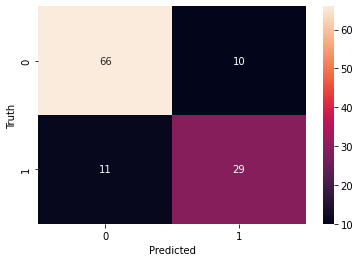

In [15]:
# printing the confusion matrix
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(6,4))
sn.heatmap(cm, annot=True, )
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [16]:
# printing the classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.86      0.87      0.86        76
           1       0.74      0.72      0.73        40

    accuracy                           0.82       116
   macro avg       0.80      0.80      0.80       116
weighted avg       0.82      0.82      0.82       116



In [18]:
# saving the trained model for later use
pickle.dump(model_lr,open('../Saved Models/diabetes.pickle','wb'))